# Bio Big Data Analysis
# Assignment II (Group Work)
# Group Members
1. Omara Isaac Emmanuel (Reg No: HD07/29395U)
2. Kakembo Fredrick (Reg No:)
3. Nabirye Stella Esther(Reg No:)



# Table of Contents

1. Introduction
2. Intuition
3. Univariate Analysis
4. Multivariate Analysis
5. Data Preprocessing
6. Modeling


# Introduction
Houses comprise the most common means of accumulating personal wealth for any family. However, as the measure of that value is not always clear, it becomes necessary to assess the value of the house between sales. These assessments are used not just for setting a sales price but for other purposes like second mortgages and home owners’ insurance. It is therefore necessary to make them as accurate as possible. In this work,we shall review important features which can be used to achieve accuracy in predicting housing prices. We shall employ regression models and tree based models, using various features to achieve lower Residual Sum of Squares error. While using features in a regression models, some feature engineering is required for better prediction. As these models are expected to be susceptible towards over fitting, Lasso, ridge regressions are used to reduce it.(Ref:https://www.ijraset.com/fileserve.php?FID=22740)

We will start by conducting some exploratory data analysis followed by processing the data based on our findings. The goal is ultimately to accurately predict the Sales Price of houses in the test set given the data in the training set.

# 1). Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

Before we perform any downstream analysis, we shall explore the structure of the data and the relationships between the variables in the data set.With a detailed EDA of the ames train data set, we will first of all learn about the structure of the data and the relationships between the variables in the data set. This EDA will involve creating and reviewing many plots/graphs and considering the patterns and relationships that we shall see.After we have explored completely, we shall submit the three graphs/plots that we find most informative during the EDA process, and we will briefly explain what we have learnt from each.

So in this exploration we are going to;

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

Reference: https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

# Intuition: Getting to Know the Data
Before we start our more rigorous analysis, let's start by familiarizing ourselves with the data first. We don't need to look at every feature (yet), but getting a feel for some features that are immediately relevant to us may help us build some intuition and generate ideas or questions.

# Importing the Required Packages to be Used

In [38]:
# Plotting and Data manipulation
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import sklearn as sk
import seaborn as sns
import scipy as sy
from scipy import stats
from scipy.stats import norm

# To read our csv files into our space
from pandas import read_csv

import warnings
warnings.filterwarnings('ignore')

# Loading Our Data Sets

In [39]:
# Load the TRAIN DATA SET
train = pd.read_csv("../input/group-assignment-ace-2020/train.csv")

# Load the TEST DATA SET
test = pd.read_csv("../input/group-assignment-ace-2020/test.csv")

# General Overview
Let's begin by getting high-level look at our data.

In [40]:
# How is our data shaping up?
print('The training dataset has {} rows and {} columns.'.format(train.shape[0], train.shape[1]))
print('The test dataset has {} rows and {} columns.'.format(test.shape[0], test.shape[1]))

The training dataset has 1460 rows and 81 columns.
The test dataset has 1459 rows and 80 columns.


In [41]:
# Take a sneak peak at the train data
print('Training Data Shape: ', train.shape)
train.head()

Training Data Shape:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
# Checking the Shape of the Test Data Set # Obviously this doesnt have the Sale Price
print('Testing Data Shape: ', test.shape)
test.head()

Testing Data Shape:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [43]:
# Get information on our columns and data size
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Checking for Missing Values

In [44]:
#check missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Out of 81 features, 19 features have missing values. Let's check the percentage of missing values in these columns.

# Checking the Percentage of these Missing Values

In [45]:
# Missing Value counts in each of these columns 
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

We can infer that the variable PoolQC has 99.5% missing values followed by MiscFeature, Alley, and Fence. Let's look at a pretty picture explaining these missing values using a bar plot. 

# Visualizing the Missing Values Using a Bar Plot

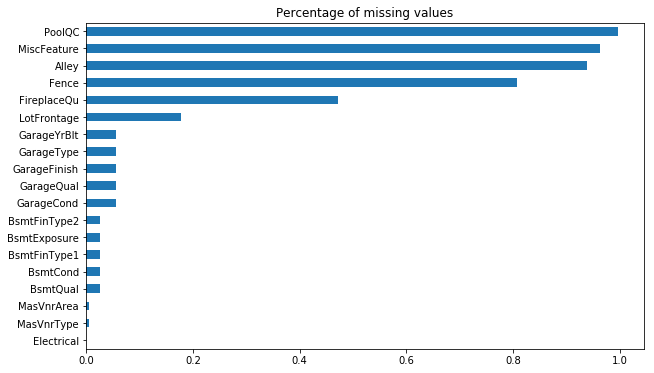

In [46]:
# Missing values
missing_data = train.isnull().sum() / train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

# General Questions about house prices
let's start poking around and ask some questions based on our existing knowledge of housing in general, without yet going into the details of every feature.

The cheapest house was sold for $34,900 and the most expensive was sold for $755,000
The average sales price is $180,921, while the median is $163,000


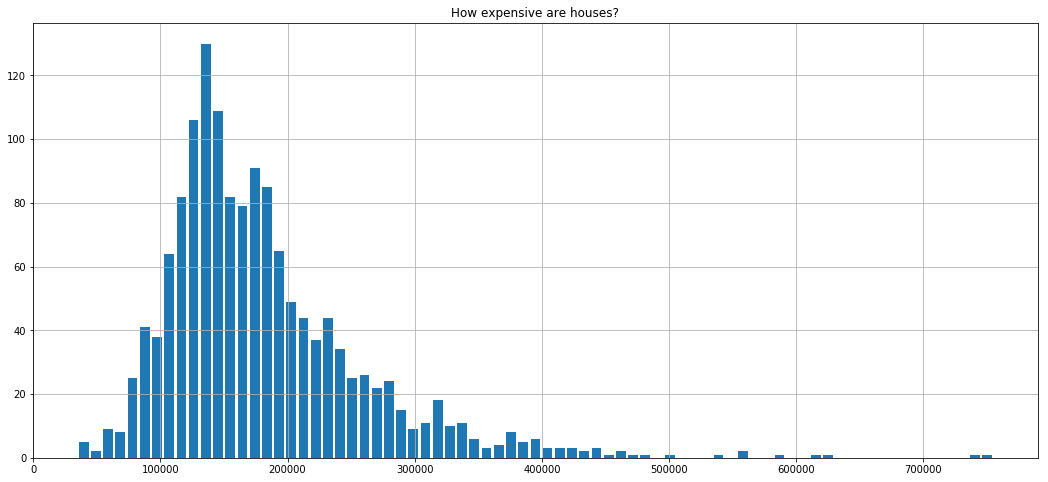

In [47]:
# How expensive are houses?
print('The cheapest house was sold for ${:,.0f} and the most expensive was sold for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while the median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(18,8))
plt.title('How expensive are houses?')
plt.show()

We note that the distribution is postively skewed to the right with a great number of outliers

The oldest house was built in 1872. The Newest house was built in 2010.


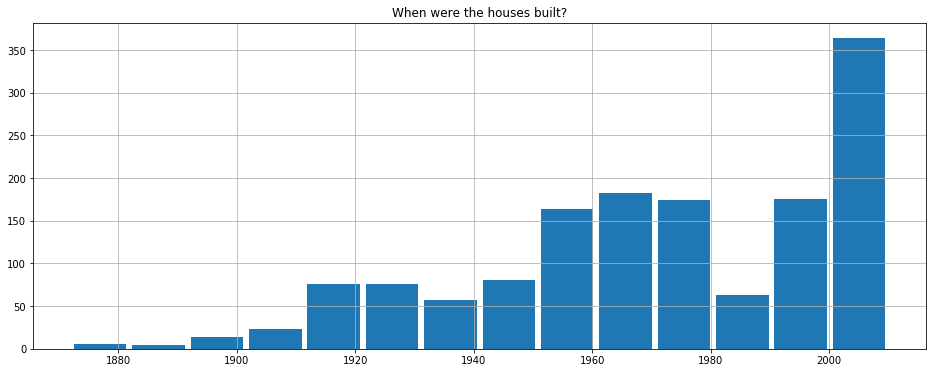

In [48]:
# When were the houses built?
print('The oldest house was built in {}. The Newest house was built in {}.'.format(
    train.YearBuilt.min(), train.YearBuilt.max()))
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(16,6))
plt.title('When were the houses built?')
plt.show()



Not much action in the 80s apparently. Looks like majority of houses were built in the 50s and after, which good chunk of new houses were built after words

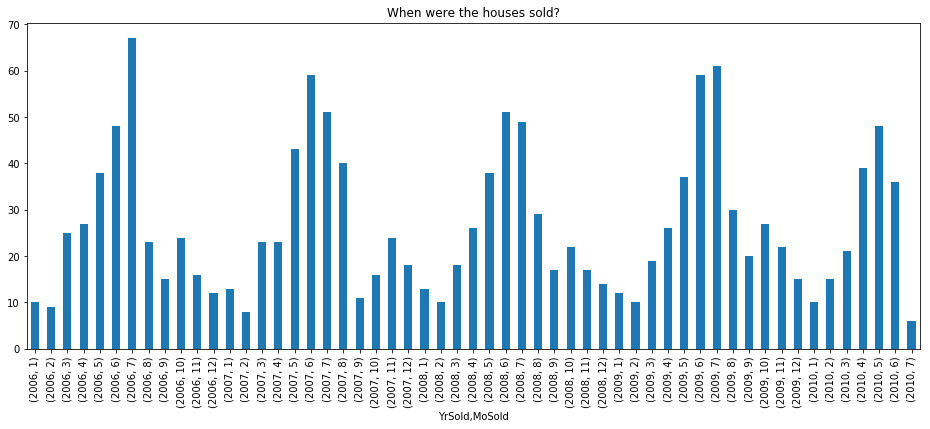

In [49]:
# When were the houses sold?
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(16,6))
plt.title('When were the houses sold?')
plt.show()

The plots above look quit interesting. We observe a strong seasonal pattern in the house sales, with high peaks in the month of June and July. We conclude that the dataset spans 2006 to 2010, but note that data steps mid-year in July of 2010.

At this point we are wondering if the time of year a house is sold has any effect on sales price. We'll address this question once we start our multivariate analysis later on.

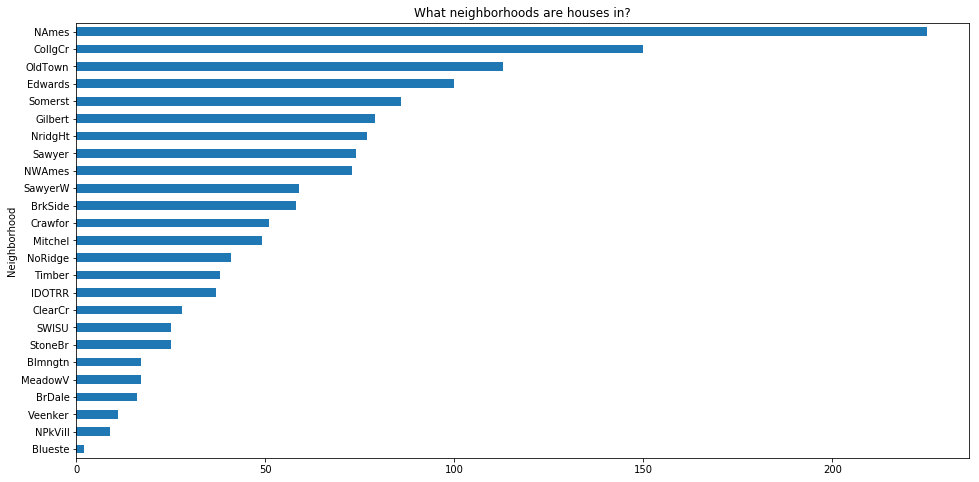

In [50]:
# Where are houses?
train.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(16,8))
plt.title('What neighborhoods are houses in?')
plt.show()

It looks like a good chunk of houses are found in North Ames, Collect Creek, and Old Town, with few houses in Bluestem, Northpark Villa and Veenker.

The average house has 1,515 sq ft of space, the median 1,464 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


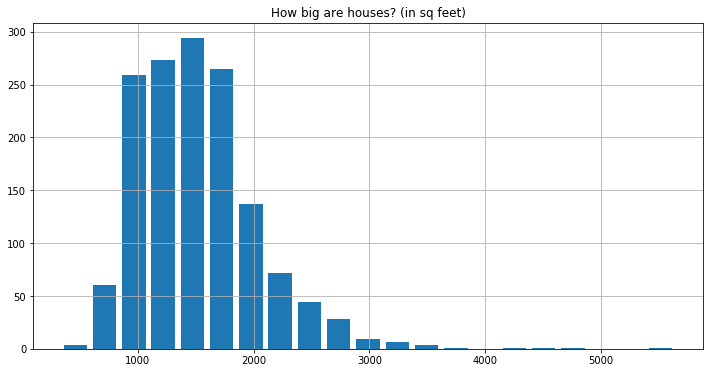

In [51]:
# How big are houses
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    train.GrLivArea.mean(), train.GrLivArea.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    train.GrLivArea.max(), train.GrLivArea.min()))
train.GrLivArea.hist(bins=21, rwidth=.8, figsize=(12,6))
plt.title('How big are houses? (in sq feet)')
plt.show()


# Distribution of the Target Variable (Sale Price)

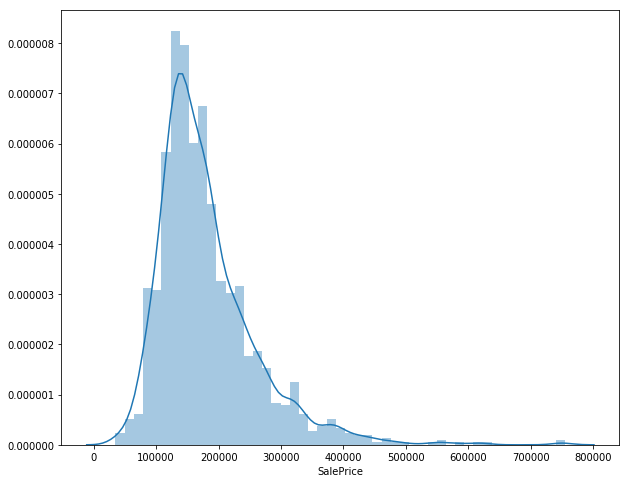

In [52]:
# Plotting a Histogram to study the distribution of the Sale Price which is the target variable
sns.distplot(train['SalePrice'])

We see that the target variable SalePrice has a right-skewed distribution (Not Normally Distributed), but it is close enough for our models. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric. The tail continues far to the right compared to the left side. Also, it is observed that there won’t be homes sold for less than $0). 

# Checking for Skewness
Skewed data is common in data science; skew is the degree of distortion from a normal distribution. ... If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance

Why do we care if the data is skewed? If the response variable is skewed like for example to the right as shown below, the model will be trained on a much larger number of priced variables, and will be less likely to successfully predict the target variable. The concept is the same as training a model on imbalanced categorical classes. If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance.

Reference: https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0

In [53]:
# Checking for how much of the Sale Price is positively skewed to the right 
print("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


# Transforming Skewed Data
We can address skewed variables by transforming them (i.e. applying the same function to each value). Common transformations include square root (sqrt(x)), logarithmic (log(x)), and reciprocal (1/x). We’ll apply each in Python to the right-skewed response variable Sale Price.

Reference: https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0

# i) Square Root Transformation

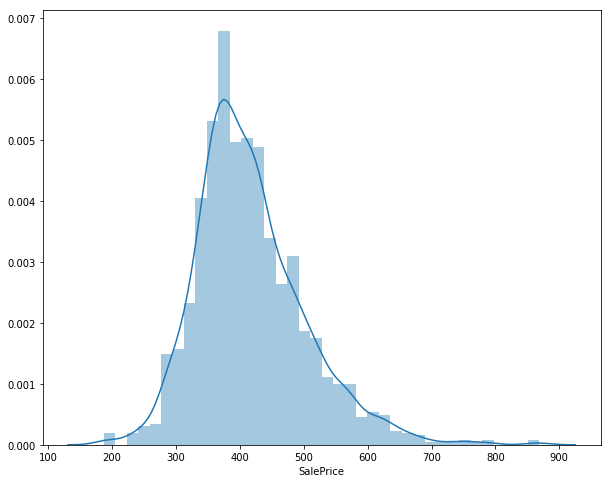

In [54]:
resp = train.SalePrice
sqrt_resp = resp**(.5)
sns.distplot(sqrt_resp)

After transforming, the data is definitely less skewed, but there is still a long right tail.

# ii) Reciprocal Transformation

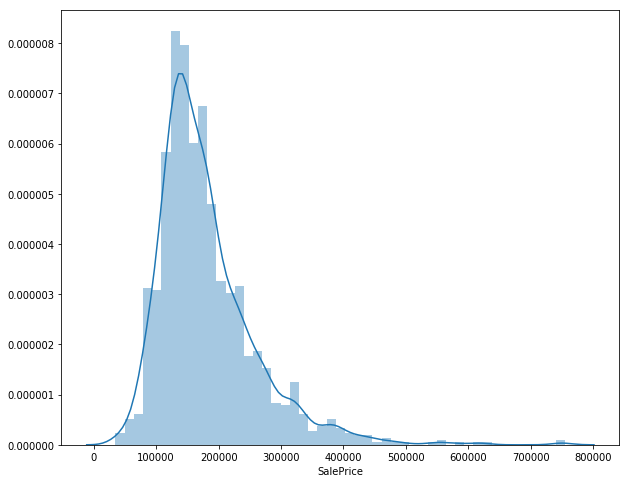

In [55]:
# Applying Reciprocal Transformation
recip =1/resp
sns.distplot(resp)

Still not great, the above distribution is not quite symmetrical.

# iii) Log Transformation

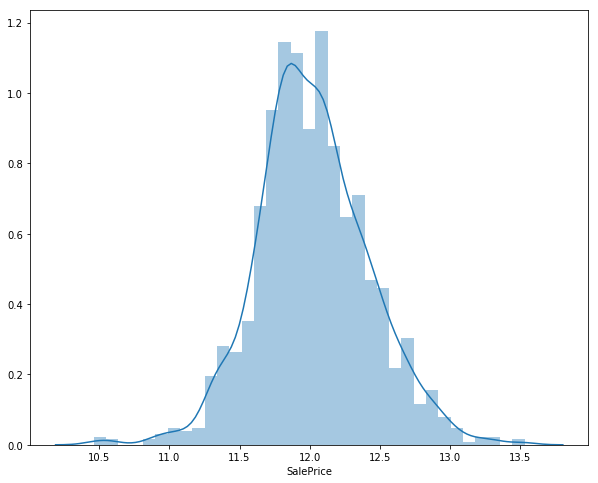

In [56]:
# Using log transformation
log_resp = np.log(resp)
sns.distplot(log_resp)

The log transformation seems to be the best, as the distribution of transformed sale prices is the most symmetrical.

# Alternatively;

Skewness is 0.12133506220520406


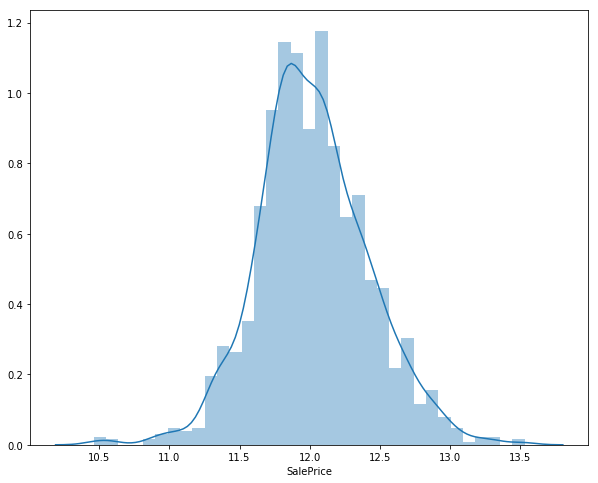

In [57]:
# We can transform the target variable (Sale Price), this way Using the log transmformation
target = np.log(train['SalePrice'])
print ('Skewness is', target.skew())
sns.distplot(target)

As you saw, log transformation of the target variable has helped us fixing its skewed distribution and the new distribution looks closer to the normal distribution. Since we have 80 variables, visualizing one by one wouldn't be an astute approach. Instead, we'll look at some variables based on their correlation with the target variable. However, there's a way to plot all variables at once, and we'll look at it as well. Moving forward, we'll separate numeric and categorical variables and explore this data from a different angle. 

In [58]:
# Separate Variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 43 categorical columns in train data


# Removing the id variable from the numerics
Now, we are interested to learn about the correlation behavior of numeric variables. Out of 38 variables, I presume some of them must be correlated. If found, we can later remove these correlated variables as they won't provide any useful information to the model. 

In [59]:
# Remove the Id label from the column
del numeric_data['Id']

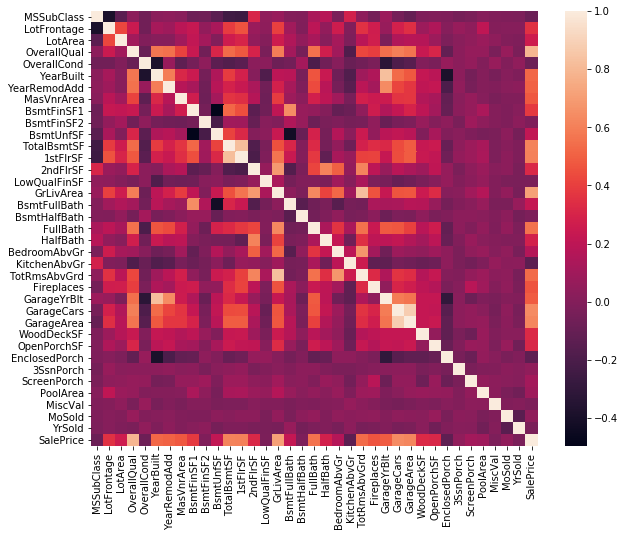

In [60]:
# Correlation Plot showing how all Variables are related with SalePrice
corr = numeric_data.corr()
sns.heatmap(corr)

Here we notice the last row of this map. We can see the correlation of all variables against SalePrice. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better. 

In [61]:
# Displaying the Correlation between Sale Price with the first 15 values
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') 

# For the last 5 values
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) 

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Here we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. Well, this make sense as well. People usually consider these parameters for their dream house. In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc.

Reference: http://jse.amstat.org/v16n2/datasets.pardoe.html

In [62]:
# Checking for the OverallQual Variable in detail
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

The overall quality is measured on a scale of 1 to 10. Hence, we can fairly treat it as an ordinal variable. An ordinal variable has an inherent order. For example, Rank of students in class, data collected on Likert scale, etc. Let's check the median sale price of houses with respect to OverallQual. You might be wondering, “Why median ?” We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.

We can create such aggregated tables using pandas pivot tables quite easily. 

In [63]:
#let's check the mean price per quality and plot it.
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


Let's plot this table and understand the median behavior using a bar graph.

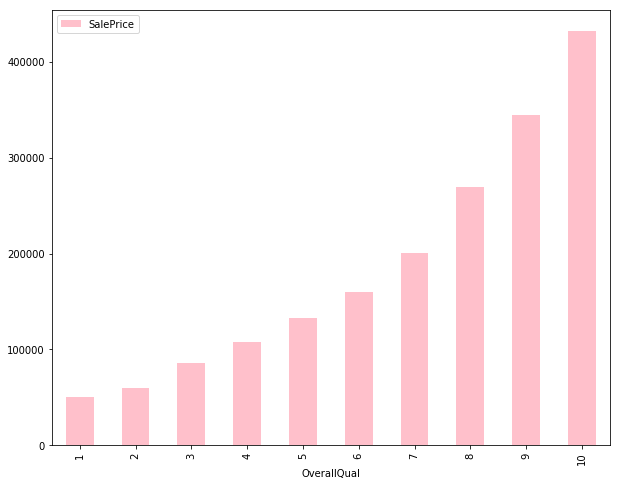

In [64]:
pivot.plot(kind='bar', color='pink')

This behavior is quite normal. As the overall quality of a house increases, its sale price also increases. Let's visualize the next correlated variable GrLivArea and understand their behavior. 

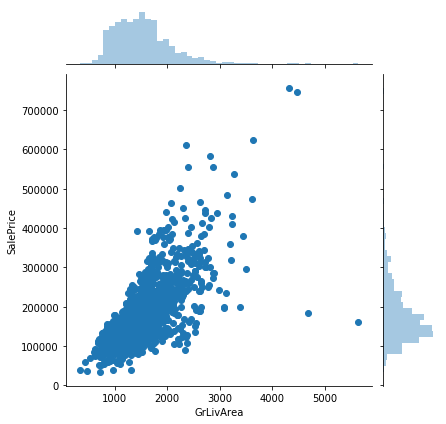

In [65]:
# GrLivArea variable
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])

As seen above, here also we see a direct correlation of living area with sale price. However, we can spot an outlier value GrLivArea > 5000. I've seen outliers play a significant role in spoiling a model's performance. Hence, we'll get rid of it. If you are enjoying this activity, you can visualize other correlated variables as well. Now, we'll move forward and explore categorical features. The simplest way to understand categorical variables is using .describe() command. 

# Correlation in Categorical Variables

In [66]:
# Having a view on the dataframe for the Categorical Variables generated
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Let's check the median sale price of a house based on its SaleCondition. SaleCondition explains the condition of sale. Not much information is given about its categories. 

In [67]:
sp_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


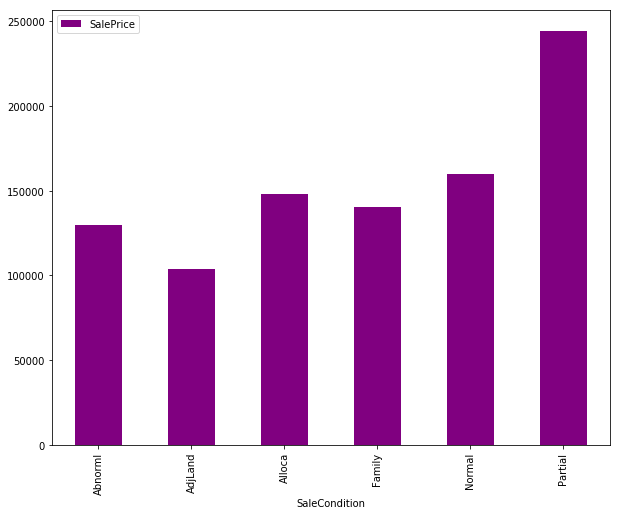

In [68]:
sp_pivot.plot(kind='bar',color='purple')

We see that SaleCondition Partial has the highest mean sale price. Though, due to lack of information we can't generate many insights from this data. Moving forward, like we used correlation to determine the influence of numeric features on SalePrice.

# Correlation between Categorical Variables and SalePrice (ANOVA test)
Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice. ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups. For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). If the mean of these levels with respect to the target variable is the same, the ANOVA test will capture this behavior and we can safely remove them.

While using ANOVA, our hypothesis is as follows:

Ho - There exists no significant difference between the groups. Ha - There exists a significant difference between the groups.



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

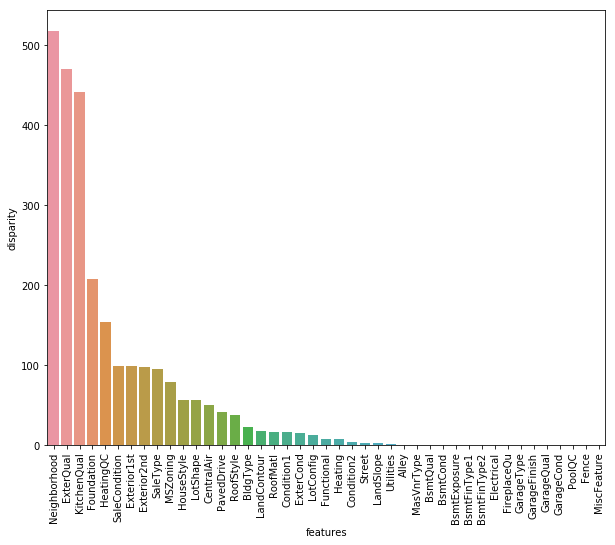

In [69]:
# Now, we'll define a function which calculates p values. 
# From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price. 

cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

Here we see that among all categorical variables Neighborhood turned out to be the most important feature followed by ExterQual, KitchenQual, etc. It means that people also consider the goodness of the neighborhood, the quality of the kitchen, the quality of the material used on the exterior walls, etc. 

# Distribution of Numeric and Categorical Variables
Finally, to get a quick glimpse of all variables in the data set, we shall plot histograms for all Numeric Variables to determine if all variables are skewed. For categorical variables, we'll create a boxplot and understand their nature. 

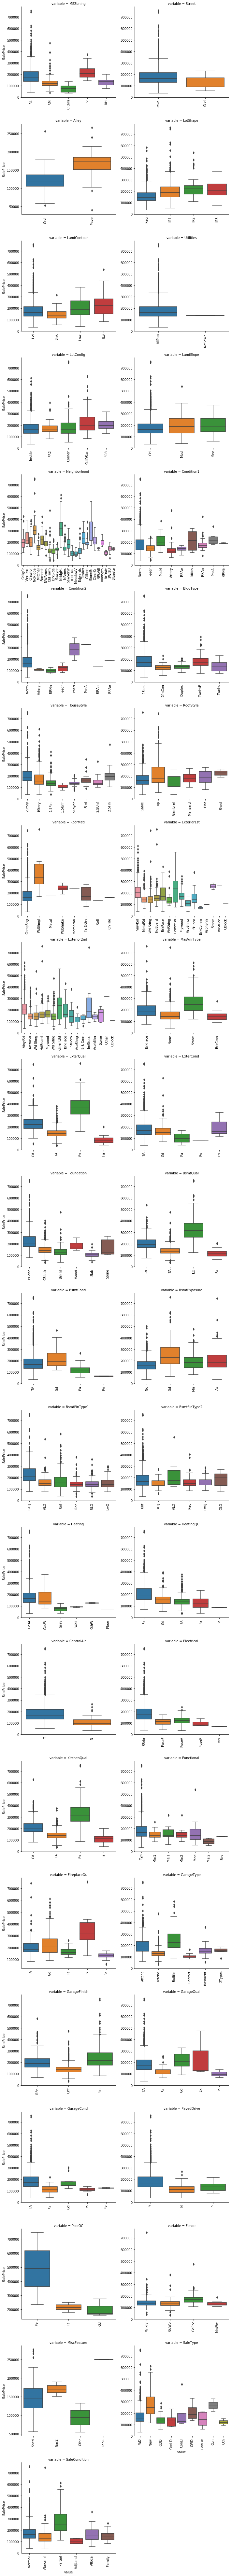

In [71]:
# Box Plots to Visualize Categoricla Variables
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

From the above box plots, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers. 


# Additional Plot

At this point we're about ready to formally process our data and get it ready for modelling, but before we do, let's look at some cool visualization to show the relationship between two categorical and one numerical variable.


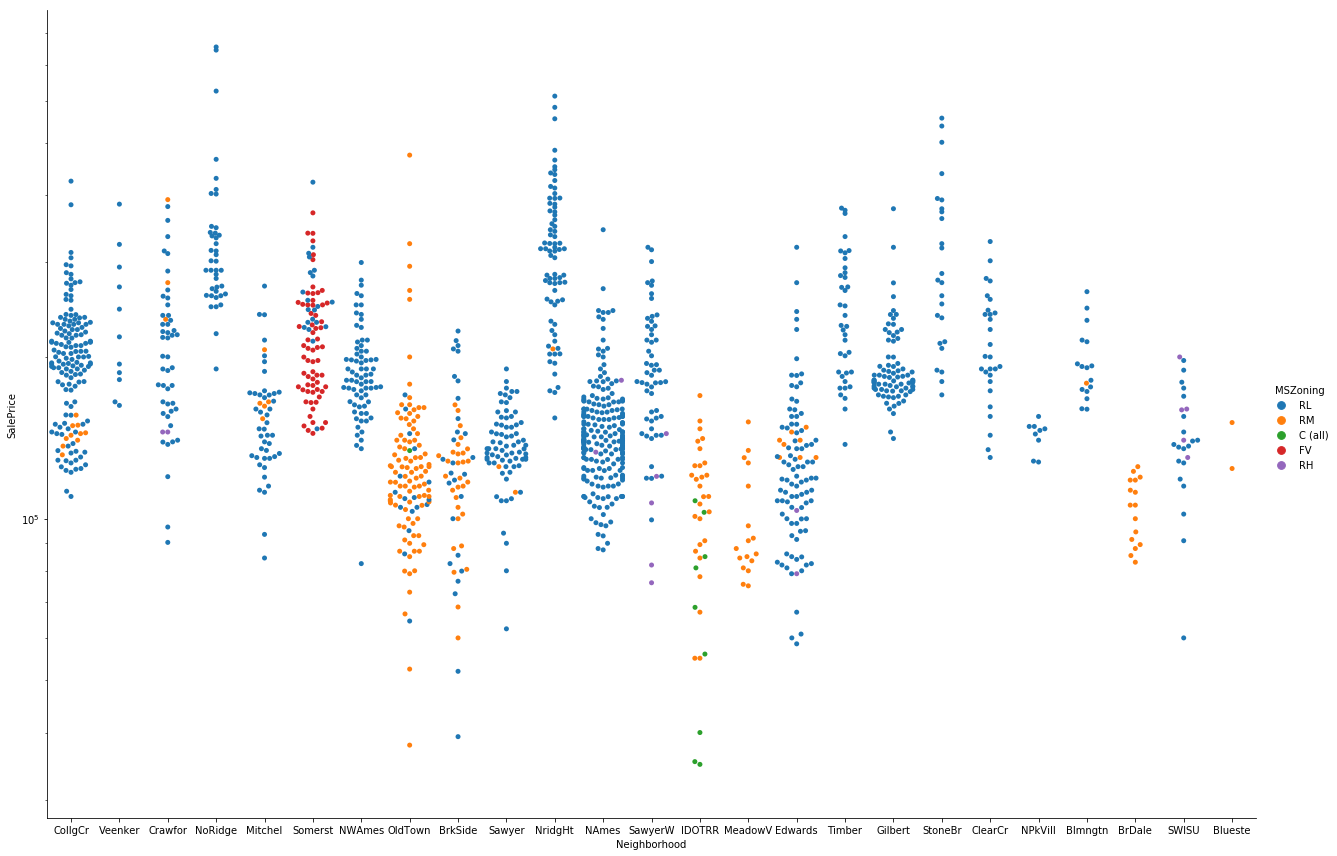

In [72]:
# A Factorplot 
fig = sns.factorplot(x='Neighborhood', y='SalePrice', hue='MSZoning', data=train, kind='swarm', size=12, aspect=1.5)
ax = fig.axes[0][0]
ax.set_yscale('log')
plt.show()

Here we're looking at sales price by neighborhood and color-coding by zoning classificaton of the sale. It looks like there is clearly some strong relationships between some neighborhoods and zoning classifications: Old Town, Brooksize, Iowa DOT and Rail Road, Meadow Village and Briardale are all predominantly in a "Residental Medium Density" zone, while Somerset is in a "Floating Village Residential" zone. We assume this might be like a gated community
